# Python implementation of LEACH protocol on WSN

## simulation parameters

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
class Node:
    def __init__(self):
        self.position = {
           'x': None,
           'y': None
        }
        self.is_CH = False
        self.power = 0.5
        self.is_dead = False
        self.last_CH_round = None
        self.closest_CH = {
            'node_id': None,
            'dist': None
        }
        self.CH_parameters = {
            "broadcast_radius": 25,
            "ad_msg_size": 16,
            "schedule_msg_size": 16,
    } 

In [3]:
x = [10, 37, 87, 8, 8, 37, 100, 68, 12, 77, 89, 87, 34, 73, 63, 37, 69, 50, 27, 73, 96, 67, 90, 26, 18, 69, 35, 17, 99, 35, 88, 73, 15, 50, 36, 5, 65, 23, 69, 57, 30, 31, 11, 35, 16, 55, 46, 13, 48, 53, 69, 28, 78, 5, 92, 72, 75, 49, 33, 35, 26, 65, 90, 28, 37, 42, 28, 80, 18, 36, 93, 74, 2, 100, 16, 91, 99, 19, 60, 15, 62, 100, 51, 85, 15, 44, 77, 19, 83, 7, 85, 46, 18, 96, 84, 34, 50, 38, 31, 42]
y = [7, 73, 8, 96, 57, 54, 51, 41, 58, 3, 100, 49, 12, 80, 23, 53, 68, 12, 78, 47, 38, 59, 96, 69, 16, 32, 25, 97, 45, 75, 51, 71, 72, 14, 14, 52, 92, 35, 29, 5, 33, 36, 53, 23, 19, 25, 16, 72, 79, 14, 68, 41, 57, 5, 82, 34, 33, 5, 68, 37, 69, 62, 58, 48, 42, 7, 14, 58, 50, 30, 57, 17, 58, 71, 72, 27, 91, 42, 87, 3, 47, 83, 16, 89, 16, 17, 97, 82, 8, 61, 91, 24, 40, 50, 77, 78, 3, 16, 64, 96]

In [4]:
# Transmition Parameters
trans_elec_loss = rec_elec_loss =  50 * pow(10,-9) #nJ/bit
trans_amp_loss = 100 * pow(10,-12) #pJ/bit/m^2

In [5]:
# class Node:
#     def __init__(self):
#         self.position = {
#             'x': None,
#             'y': None
#         }
#         self.is_CH = False
#         self.power = 0.75
#         self.is_dead = False
#         self.last_CH_round = None
#         self.closest_CH = {
#             'node_id': None,
#             'dist': None
#         }

In [6]:
class Network:
    def __init__(self):
        self.dimentions = {
            'x': 100,
            'y': 100
        }
        self.no_of_nodes = 100
        self.percentage_CH = 0.03 # percentage of nodes to become CH in each round
        self.nodes = [Node() for i in range(self.no_of_nodes)]
        self.current_round_number = 0
        for i in range(self.no_of_nodes):
            self.nodes[i].position['x'] = x[i]
            self.nodes[i].position['y'] = y[i]  
        
        self.CH_parameters = {
            "broadcast_radius": 25,
            "ad_msg_size": 4000,
            "schedule_msg_size": 4000,
    }

In [7]:
network = Network()

## Misc

In [8]:
def calc_dist(positionA, positionB):
    dist = math.sqrt((positionA['x'] - positionB['x'])**2 + (positionA['y'] - positionB['y'])**2)
    return dist

## First Order Radio Model
Energy loss due to transmition is calculated using the following formula (k bit msg transmited to distance d):
\begin{equation*}
    E_{T_{x}}(k,d) = E_{T_{x-elex}}(k) + E_{T_{x-amp}}(k,d) \\
    E_{T_{x}}(k,d) = E_{elec}*k + \epsilon_{amp}*k*d^2
\end{equation*}

Energy loss due to reception is calculated using the following formula (k bit msg):
\begin{equation*}
    E_{R_{x}}(k) = E_{R_{x-elex}}(k) \\
    E_{R_{x}}(k) = E_{elec}*k
\end{equation*}

In [9]:
def transmition_loss(msg_size, transmit_distance):
    loss = trans_elec_loss*msg_size + trans_amp_loss*msg_size*(transmit_distance**2)
    return loss

def reception_loss(msg_size):
    loss = rec_elec_loss*msg_size
    return loss

## Advertisement Phase 

1. Cluster Heads are selected
1. Every selected Cluster heads transmit the advertisement message
1. Non-CH recive the AD-msg and select the closest CH to transmit their data to.

### Cluster Head selection
* Calculate threshold
\begin{equation*}
    T(n) = 
    \begin{cases}
        \frac{P}{1-P*(rmod\frac{1}{P})} \quad &\text{if} \, n \in G \\
        0 \quad &\text{otherwise} \\
    \end{cases}
\end{equation*}
    * $P =$ percentage of nodes for CH
    * $r =$ round number
    * $G :$ nodes that have not yet been CH
* generate random number
* node becomes CH if generated random number is greter then the threshold

In [10]:
def determine_threshold(network):
    p = network.percentage_CH
    r = network.current_round_number
    T = p/(1 - p*(r%(1/p)))
    return T

In [11]:
def is_node_CH(network, node_id):
    if network.nodes[node_id].last_CH_round is None or network.nodes[node_id].last_CH_round <= network.current_round_number - network.no_of_nodes and network.nodes[node_id].is_dead is False:
        if random.uniform(0, 1) < determine_threshold(network):
            return True
        else:
            return False
    else:
        return False

In [12]:
## Test Cell
for i in range(100):
    print(is_node_CH(network, i))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
True
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [13]:
def select_CH(network):
    for i in range(network.no_of_nodes):
        network.nodes[i].is_CH = is_node_CH(network, i)

In [14]:
select_CH(network)

### Ad-Transmition

In [15]:
def adTransmission(network):
    for i in range(network.no_of_nodes):
        if network.nodes[i].is_CH is True:
            network.nodes[i].power = network.nodes[i].power - transmition_loss(network.nodes[i].CH_parameters["ad_msg_size"], network.nodes[i].CH_parameters["broadcast_radius"])

#adTransmission(network)

### Closest CH selection

In [16]:
def find_closest_CH(node_id, network):
    closest_CH_id = None
    closest_CH_dist = None
    for i in range(network.no_of_nodes):
        if network.nodes[i].is_CH is True:
            if closest_CH_id is None:
                closest_CH_id = i
                closest_CH_dist = calc_dist(network.nodes[node_id].position, network.nodes[i].position)
            else:
                dist = calc_dist(network.nodes[node_id].position, network.nodes[i].position)
                if dist < closest_CH_dist:
                    closest_CH_id = i
                    closest_CH_dist = dist
    return closest_CH_id, closest_CH_dist

In [17]:
## Test Cell
for i in range(network.no_of_nodes):
    if network.nodes[i].is_CH is False:
        print(i, find_closest_CH(i, network))

0 (44, 13.416407864998739)
1 (31, 36.05551275463989)
2 (31, 64.53681120105021)
3 (31, 69.6419413859206)
4 (44, 38.8329756778952)
5 (31, 39.81205847478876)
6 (31, 33.60059523282288)
7 (31, 30.4138126514911)
8 (44, 39.20459156782532)
9 (44, 63.06346010171025)
10 (31, 33.12099032335839)
11 (31, 26.076809620810597)
12 (44, 19.313207915827967)
13 (31, 9.0)
14 (44, 47.16990566028302)
15 (44, 39.96248240537617)
16 (31, 5.0)
17 (44, 34.713109915419565)
18 (31, 46.52956049652737)
19 (31, 24.0)
20 (31, 40.22437072223753)
21 (31, 13.416407864998739)
22 (31, 30.23243291566195)
23 (31, 47.042533945356304)
24 (44, 3.605551275463989)
25 (31, 39.20459156782532)
26 (44, 19.924858845171276)
27 (31, 61.741396161732524)
28 (31, 36.76955262170047)
29 (31, 38.2099463490856)
30 (31, 25.0)
32 (44, 53.009433122794285)
33 (44, 34.36568055487916)
34 (44, 20.615528128088304)
35 (44, 34.785054261852174)
36 (31, 22.47220505424423)
37 (44, 17.46424919657298)
38 (31, 42.190046219457976)
39 (44, 43.32435804486894)
40 

In [18]:
## Test Cell
for i in range(network.no_of_nodes):
    if network.nodes[i].is_CH is True:
        print(i)

31
44


In [19]:
def CH_in_range(node_id, network):
    count = 0
    for i in range(network.no_of_nodes):
        if network.nodes[i].is_CH is True:
            if(calc_dist(network.nodes[node_id].position, network.nodes[i].position) <= 25):
                count = count + 1
    return count

In [20]:
def updateClosestCH(network):
    for i in range(network.no_of_nodes):
        if network.nodes[i].is_CH is False and network.nodes[i].is_dead is False:
            network.nodes[i].closest_CH = find_closest_CH(i, network)
            network.nodes[i].power = network.nodes[i].power - reception_loss(network.nodes[i].CH_parameters['ad_msg_size'])*CH_in_range(i, network)

#updateClosestCH(network)

In [21]:
def updateisDead(network):
    for i in range(network.no_of_nodes):
        if network.nodes[i].power <= 0:
            network.nodes[i].is_dead = True

In [22]:
def countDeadNodes(network):
    count = 0
    for i in range(network.no_of_nodes):
        if network.nodes[i].is_dead is True:
            count = count + 1
    return count

In [23]:
def calculateEnergy(network):
    energy = 0
    for i in range(network.no_of_nodes):
        if network.nodes[i].is_dead is False:
            energy = energy + network.nodes[i].power
    return energy

In [24]:
def NumberOfRounds(network):
    deadNodes = []
    Energy = []
    for i in range(0,2000): #100 rounds
        Ti = determine_threshold(network)
        select_CH(network)
        adTransmission(network)
        updateClosestCH(network)
        updateisDead(network)
        deadNodes.append(countDeadNodes(network))
        Energy.append(calculateEnergy(network))

        network.current_round_number = network.current_round_number + 1

        for i in range(0,100):
            network.nodes[i].is_CH = False
            network.nodes[i].closest_CH = {
            'node_id': None,
            'dist': None
        }

    return deadNodes, Energy


    


            





In [25]:
deadNodes,Energy = NumberOfRounds(network)

In [26]:
Energy

[49.99997739999999,
 49.99994499999998,
 49.999878400000014,
 49.999816000000024,
 49.99977220000003,
 49.9997268,
 49.9996814,
 49.999588,
 49.99953699999999,
 49.999490800000004,
 49.99940480000001,
 49.999376399999996,
 49.99936099999999,
 49.99927900000001,
 49.99923019999999,
 49.99918160000001,
 49.99909460000001,
 49.998971399999995,
 49.998889199999994,
 49.998813800000015,
 49.99868659999997,
 49.99853159999999,
 49.998417399999994,
 49.998232999999985,
 49.998053000000006,
 49.99786779999998,
 49.997591599999986,
 49.997358399999996,
 49.997097,
 49.99681679999997,
 49.99654499999997,
 49.99616339999999,
 49.99584579999999,
 49.9956658,
 49.99561320000001,
 49.995554999999975,
 49.99549819999999,
 49.99543579999998,
 49.99535479999999,
 49.99529079999997,
 49.99518619999998,
 49.99514159999997,
 49.99507419999998,
 49.995007799999975,
 49.99492179999999,
 49.9947776,
 49.994683399999985,
 49.99464280000001,
 49.99457519999998,
 49.99452159999997,
 49.99441519999997,
 49.99434

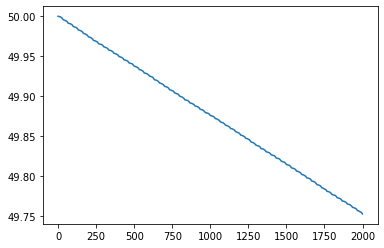

In [27]:
xr = np.arange(0,2000,1)
plt.plot(xr,Energy) 

plt.show()

In [28]:
deadNodes

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


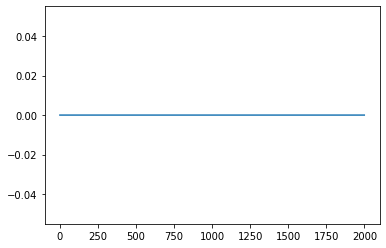

In [29]:
plt.plot(deadNodes)
plt.show()